# Dinamica Molecolare 

## Argon Solido

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


#unità per il problema    
amu = 1.6605 * 10**(-27)   #kilograms
k_B = 1.38065 * 10**(-23)  #Joules/Kelvin
sigma = 0.34*10**(-9)      #meters
epsilon = 120 * k_B        #Joules
m = 39.948 * amu           #kilograms
tau = sigma*m**(0.5)*epsilon**(-0.5) #seconds

#Carico tutto
ep_ave, ep2_ave, ep_ave2 = np.loadtxt("Solido/ave_epot.dat", usecols = (0, 1, 2), unpack = 'true')
p_ave, p2_ave, p_ave2 = np.loadtxt("Solido/ave_press.dat", usecols = (0, 1, 2), unpack = 'true')
ek_ave, ek2_ave, ek_ave2 = np.loadtxt("Solido/ave_ekin.dat", usecols = (0, 1, 2), unpack = 'true')
e_ave, e2_ave, e_ave2 = np.loadtxt("Solido/ave_etot.dat", usecols = (0, 1, 2), unpack = 'true')
t_ave, t2_ave, t_ave2 = np.loadtxt("Solido/ave_temp.dat", usecols = (0, 1, 2), unpack = 'true')

N = len(ek_ave)

#raggruppo in liste
ave = np.vstack([ep_ave*epsilon, p_ave*epsilon/sigma**3, ek_ave*epsilon, e_ave*epsilon, t_ave* epsilon/k_B])
av2 = np.vstack([ep2_ave, p2_ave, ek2_ave, e2_ave, t2_ave])
ave2 = np.vstack([ep_ave2, p_ave2, ek_ave2, e_ave2, t_ave2])
e = np.vstack([np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)])
#calcolo errori

for j in range(5):
    for i in range(N):
        e[j,i] = math.sqrt((av2[j,i] - ave2[j,i])/(i+1))

#creo una lista utile per dopo
unity=[epsilon, epsilon/sigma**3, epsilon, epsilon, epsilon/k_B]

Potential energy/particle in Natural units: -6.6397086 +/- 0.005719178262656238
SI units: -1.1000536414307997e-20 +/- 9.475420162003601e-24
-----------------------------------------------------------------
Pressure [Pa] in Natural units: 9.7513553 +/- 0.027410326521222515
SI units: 411048504.83243406 +/- 1155426.4393911816
-----------------------------------------------------------------
Kinetic Energy [J] in Natural units: 1.2220366 +/- 0.00563710918822775
SI units: 2.0246457981479997e-21 +/- 9.33944976087197e-24
-----------------------------------------------------------------
Energy [J] in Natural units: -5.41767199 +/- 0.0002334523505930147
SI units: -8.975890599592198e-21 +/- 3.867791854154948e-25
-----------------------------------------------------------------
Temperature [K] in Natural units: 0.8146911 +/- 0.0037580580091317404
SI units: 97.762932 +/- 0.45096696109580886
-----------------------------------------------------------------


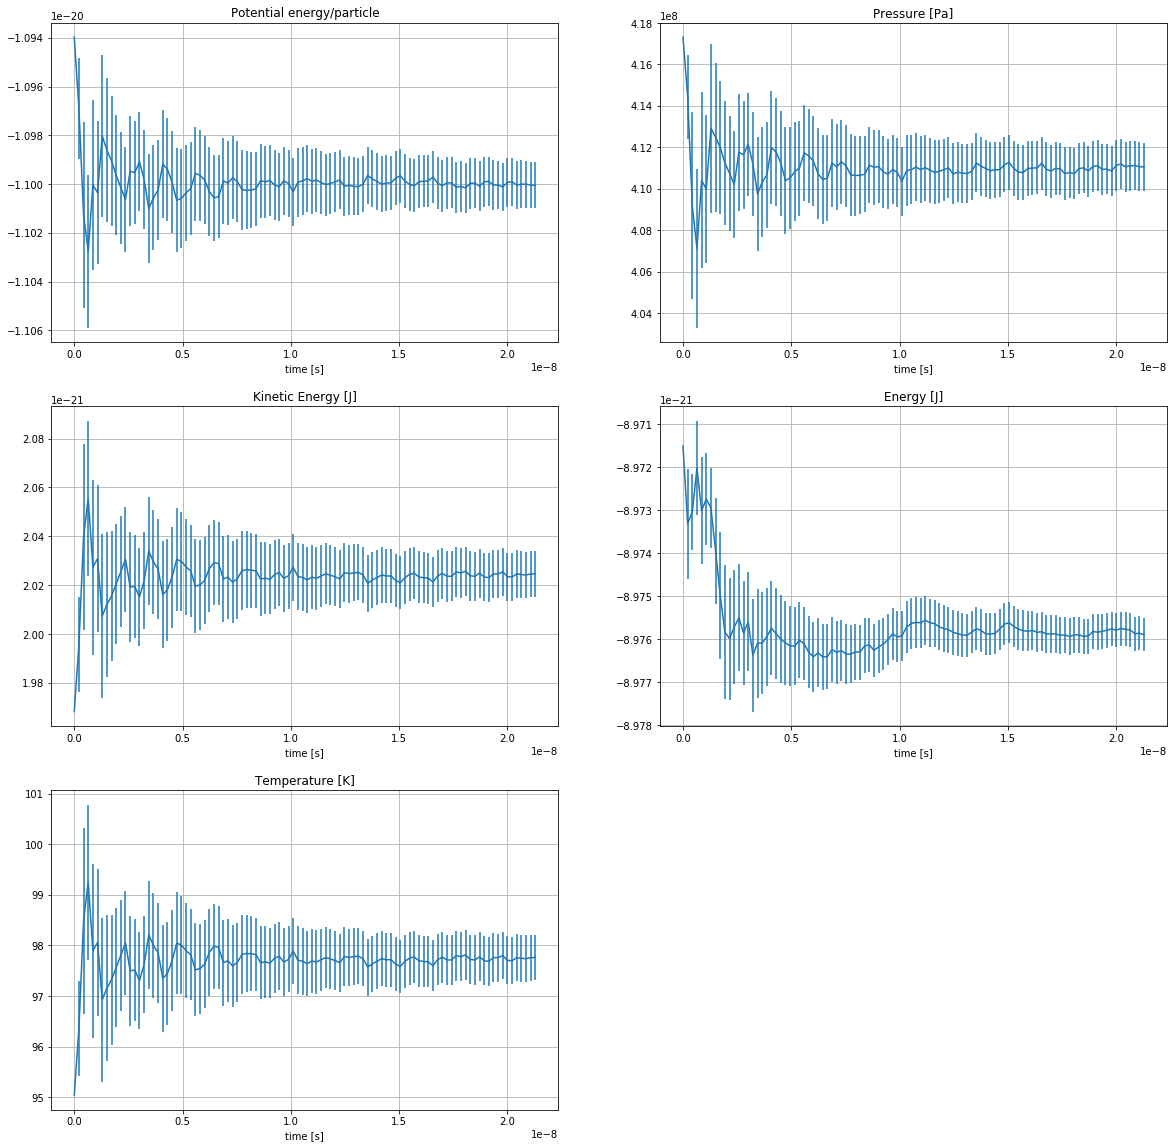

In [37]:
n =np.arange(N)
f = plt.figure(figsize = (20, 20))   
text = ['Potential energy/particle', 'Pressure [Pa]', 'Kinetic Energy [J]','Energy [J]','Temperature [K]']
for i in range(5):
    f.add_subplot(3, 2, 1+i)      
    plt.errorbar(n*tau*100, ave[i,:], e[i,:]*unity[i])
    plt.xlabel('time [s]')
    plt.title(text[i])
    plt.grid(True)


for i in range(5):
    print(text[i]+" in Natural units:", ave[i,N-1]/unity[i], "+/-", e[i,N-1])
    print ("SI units:", ave[i,N-1], "+/-" ,e[i,N-1] * unity[i])
    print("-----------------------------------------------------------------")
    